In [115]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [ ]:
#import cancer library from sklearn_library
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [ ]:
data=pd.DataFrame(np.c_[data['data'],data['target']],columns=np.append(data['feature_names'],['diagnosis']))

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.shape

(569, 33)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [9]:
# Delete unused columns
data.drop(["Unnamed: 32","id"], axis=1, inplace=True)

# Change label M(ganas = malignant) = 1 dan B(jinak = benign) = 0
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


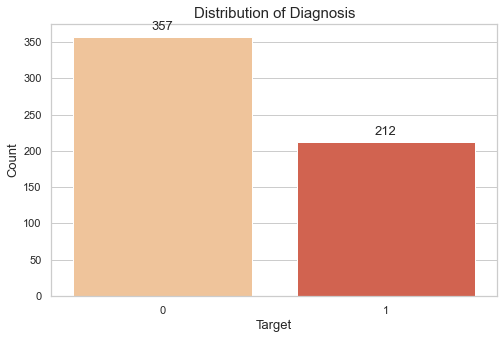

In [10]:
plt.figure(figsize=(8,5))
vis1 = sns.countplot(data['diagnosis'], palette='OrRd')
plt.title('Distribution of Diagnosis', fontsize=15)
plt.xlabel('Target', fontsize=13)
plt.ylabel('Count', fontsize=13)

for p in vis1.patches:
    vis1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

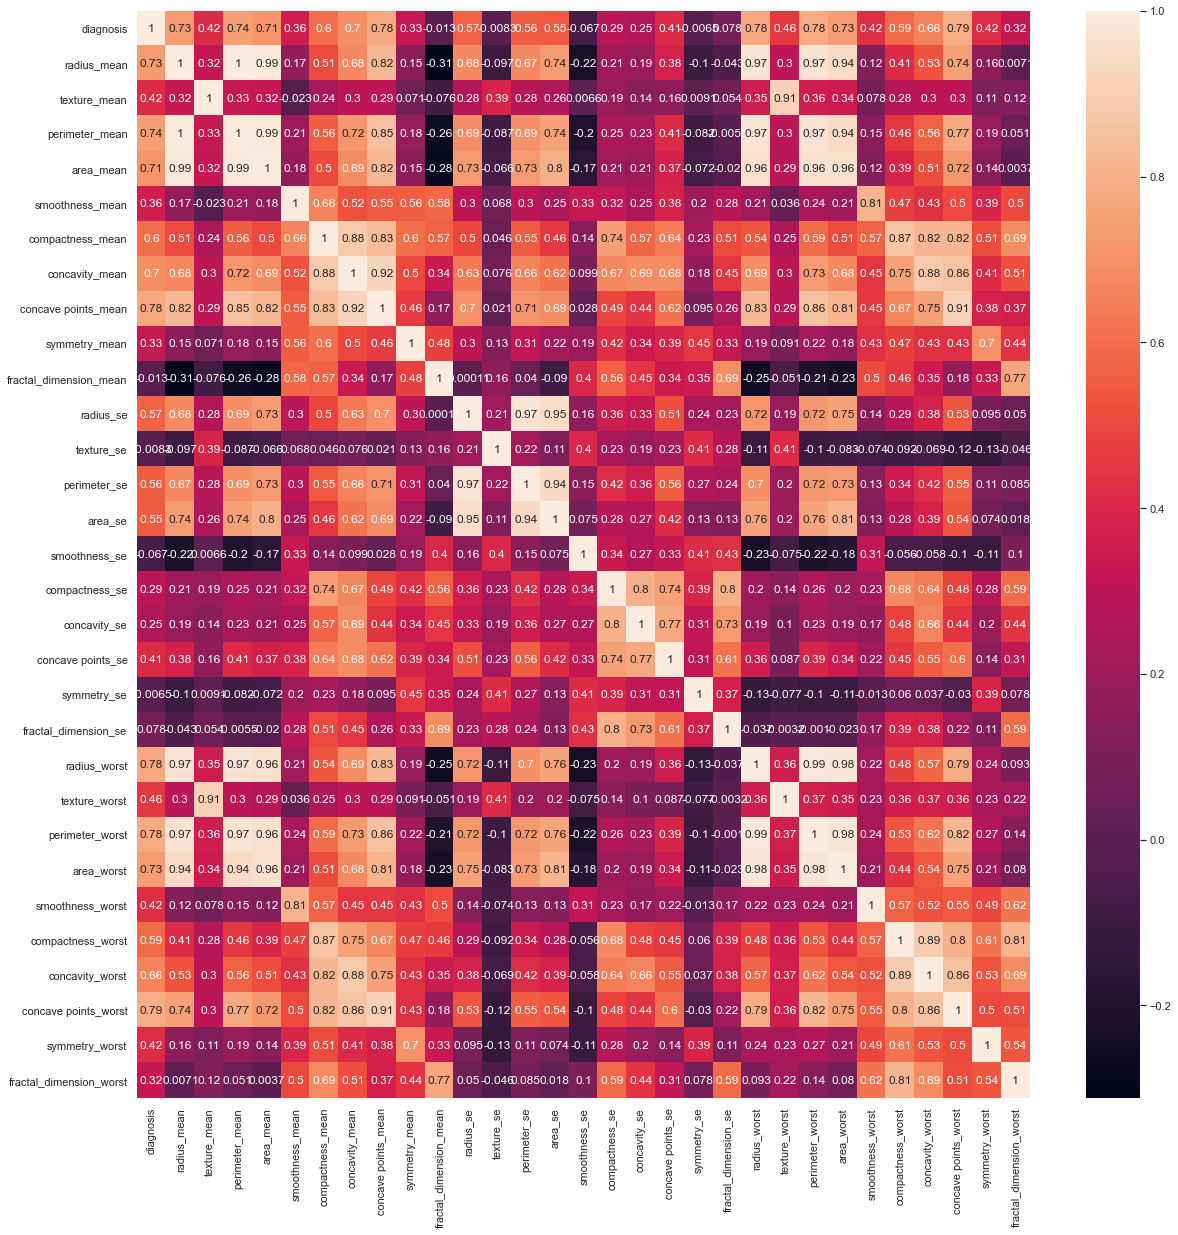

In [11]:
#Plot rectangular data as a color-encoded matrix. Using it to check the correlation between data usnig HEATMAP.
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'Percentage of each Diagnosis Class in Dataset')

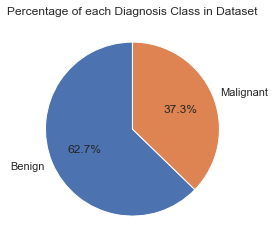

In [12]:
benign_num = len(data[data['diagnosis'] == 0])
malig_num  = len(data[data['diagnosis'] == 1])
num_list = [benign_num,malig_num]
class_names = ['Benign','Malignant']

fig, ax = plt.subplots()
ax.pie(num_list,labels=class_names, autopct='%1.1f%%',shadow=False, startangle=90)
ax.set_title("Percentage of each Diagnosis Class in Dataset")

In [13]:
y_data = data["diagnosis"]
X_data = data.drop("diagnosis", axis=1)

C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

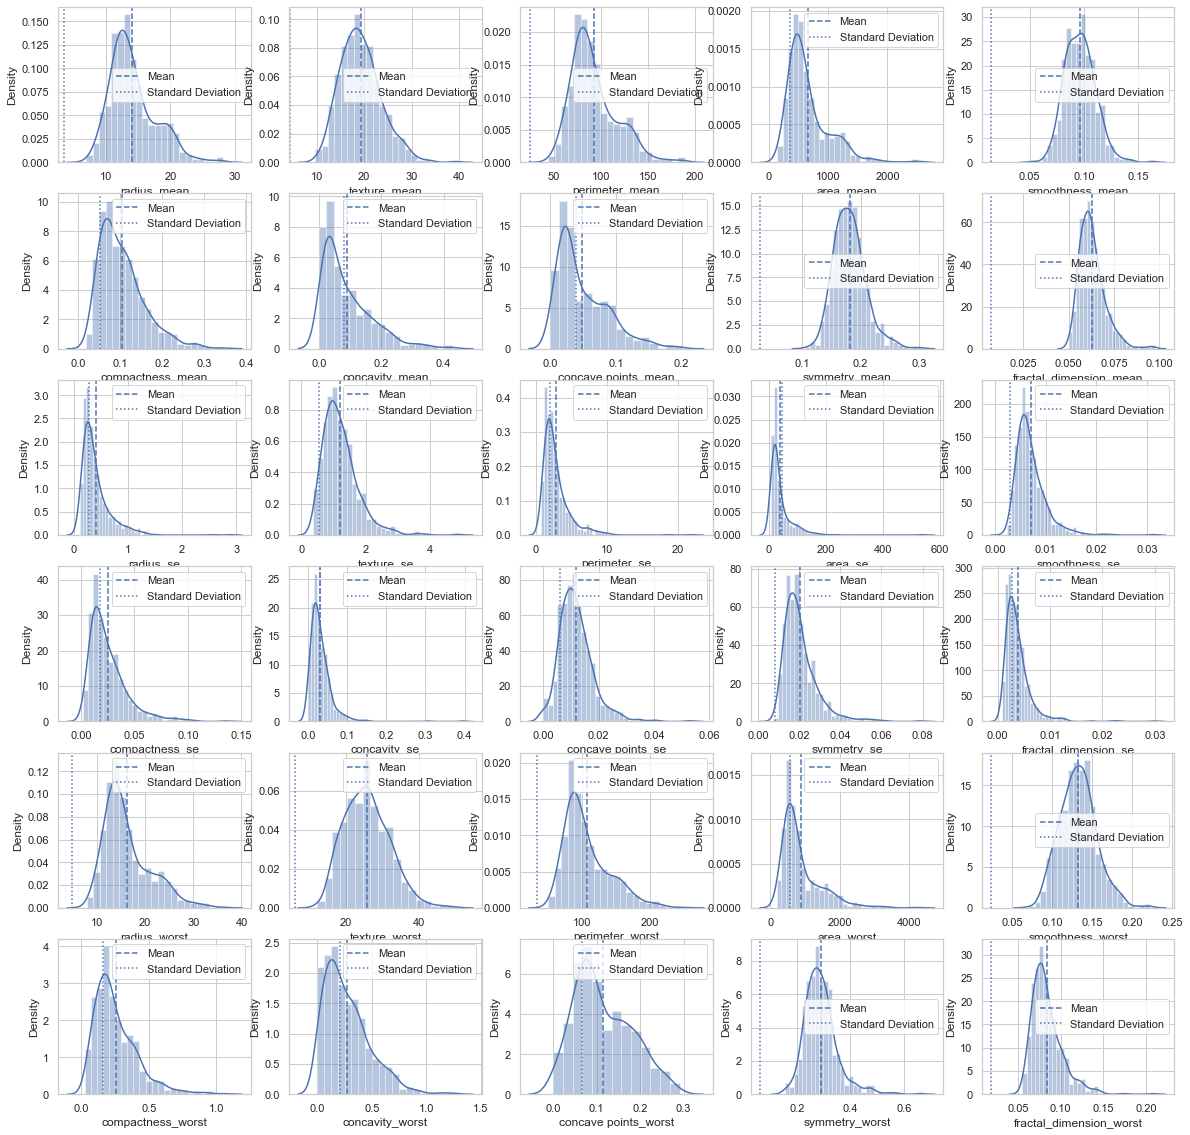

In [14]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_data.columns):
    plt.subplot(6, 5, i + 1)
    sns.distplot(X_data[col], kde=True)
    plt.axvline(X_data[col].mean(), linestyle="dashed", label="Mean")
    plt.axvline(
        X_data[col].std(), color="b", linestyle="dotted", label="Standard Deviation"
    )
    plt.legend(loc="best")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023549C040A0>,
      dtype=object)

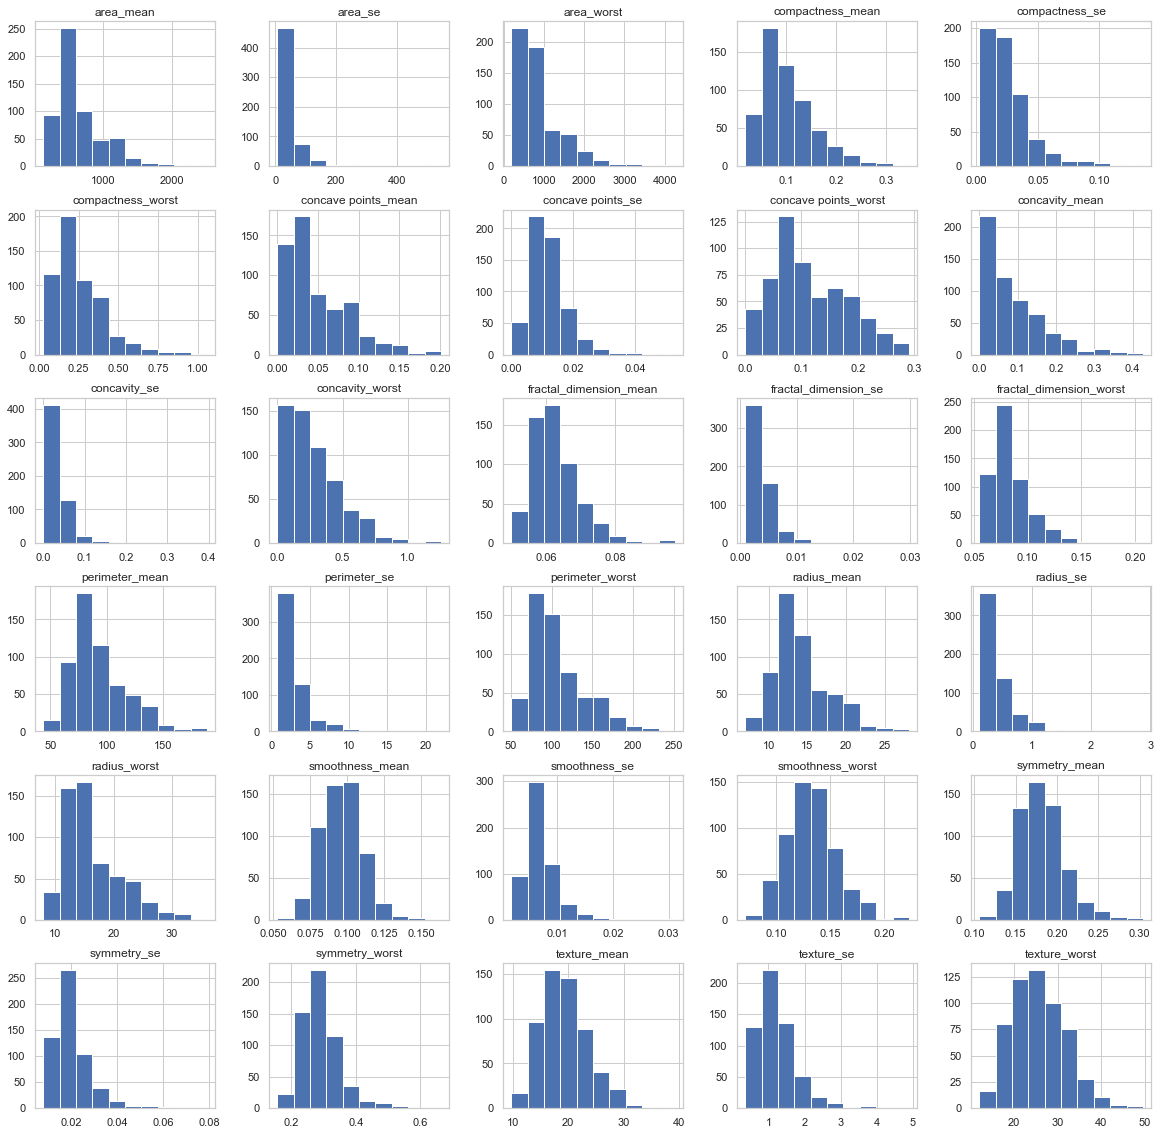

In [15]:
X_data.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023549313640>,
      dtype=object)

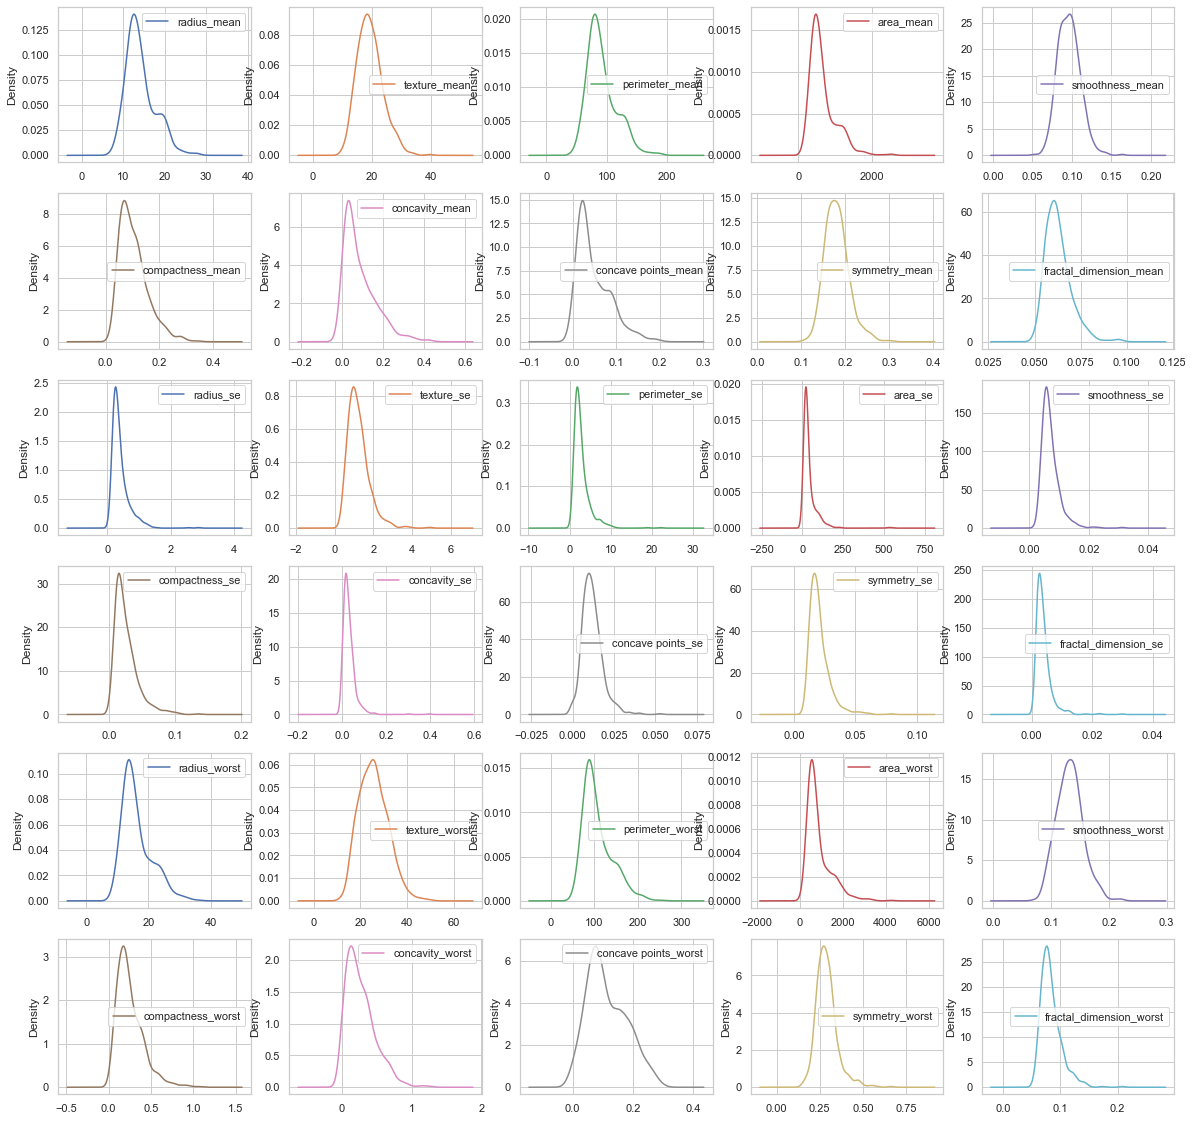

In [16]:
X_data.plot(kind='density', subplots=True, layout=(6,5), sharex=False, sharey=False,figsize=(20,20))

radius_mean                   AxesSubplot(0.125,0.772143;0.133621x0.107857)
texture_mean               AxesSubplot(0.285345,0.772143;0.133621x0.107857)
perimeter_mean              AxesSubplot(0.44569,0.772143;0.133621x0.107857)
area_mean                  AxesSubplot(0.606034,0.772143;0.133621x0.107857)
smoothness_mean            AxesSubplot(0.766379,0.772143;0.133621x0.107857)
compactness_mean              AxesSubplot(0.125,0.642714;0.133621x0.107857)
concavity_mean             AxesSubplot(0.285345,0.642714;0.133621x0.107857)
concave points_mean         AxesSubplot(0.44569,0.642714;0.133621x0.107857)
symmetry_mean              AxesSubplot(0.606034,0.642714;0.133621x0.107857)
fractal_dimension_mean     AxesSubplot(0.766379,0.642714;0.133621x0.107857)
radius_se                     AxesSubplot(0.125,0.513286;0.133621x0.107857)
texture_se                 AxesSubplot(0.285345,0.513286;0.133621x0.107857)
perimeter_se                AxesSubplot(0.44569,0.513286;0.133621x0.107857)
area_se     

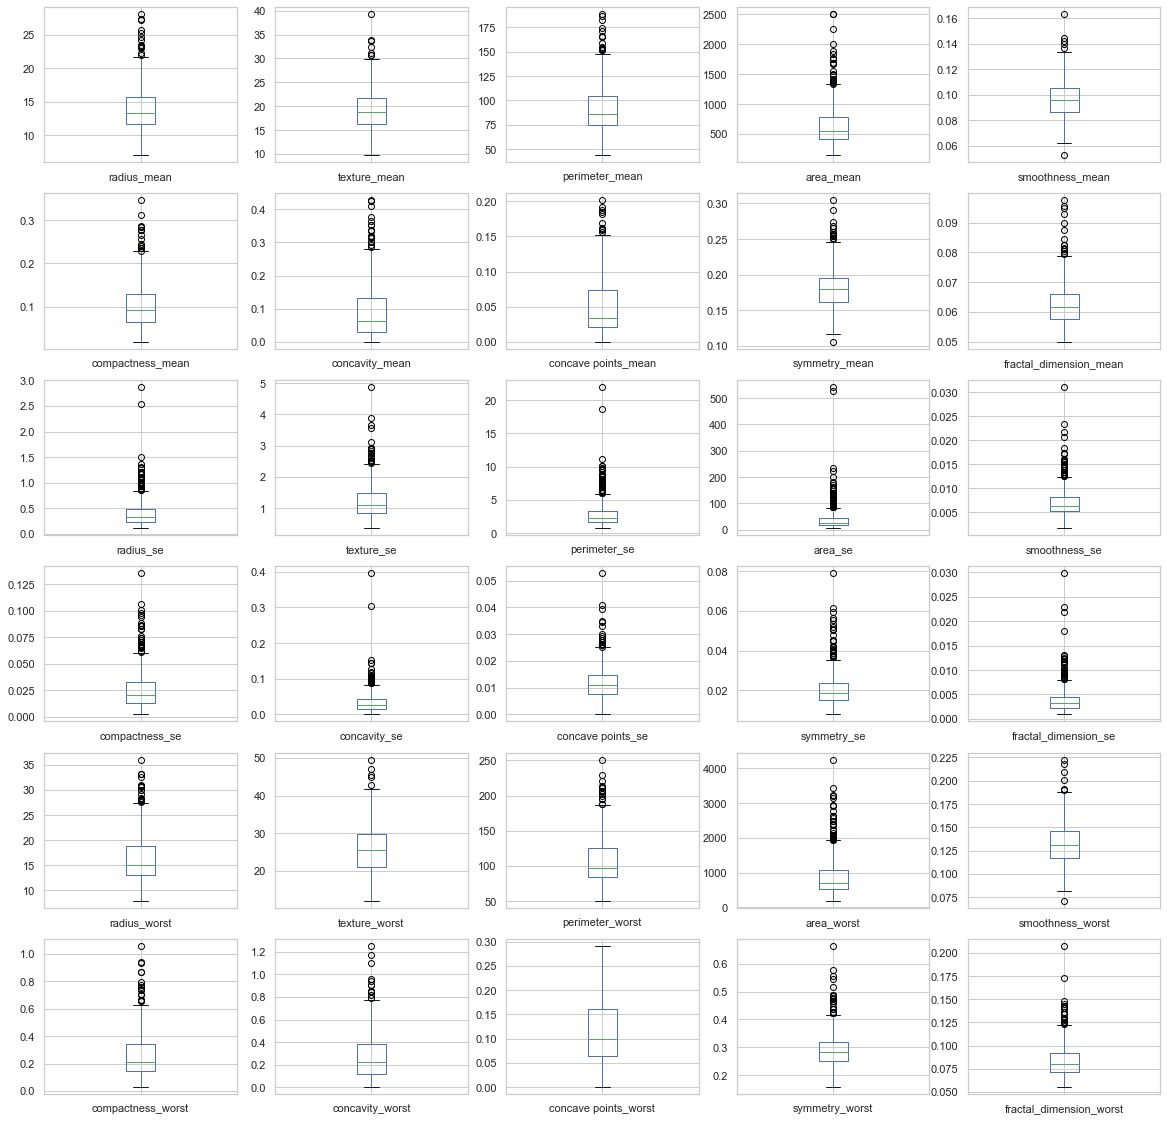

In [17]:
X_data.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False,figsize=(20,20))

In [18]:
df_mean = data[data.columns[:11]]
df_se = data.drop(data.columns[1:11], axis=1)
df_se = df_se.drop(df_se.columns[11:], axis=1)
df_worst = data.drop(data.columns[1:21], axis=1)

# Correlation with Diagnosis:

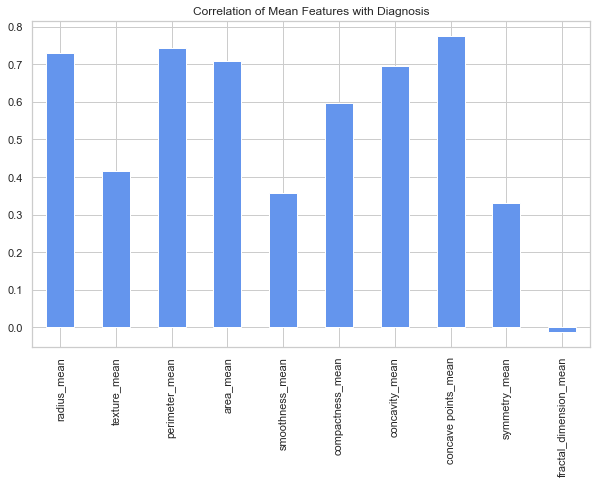

In [19]:
# Correlation of Mean Features with Diagnosis:
plt.figure(figsize=(10,6))
df_mean.drop("diagnosis", axis=1).corrwith(df_mean.diagnosis).plot(kind='bar', grid=True, title="Correlation of Mean Features with Diagnosis", color="cornflowerblue")

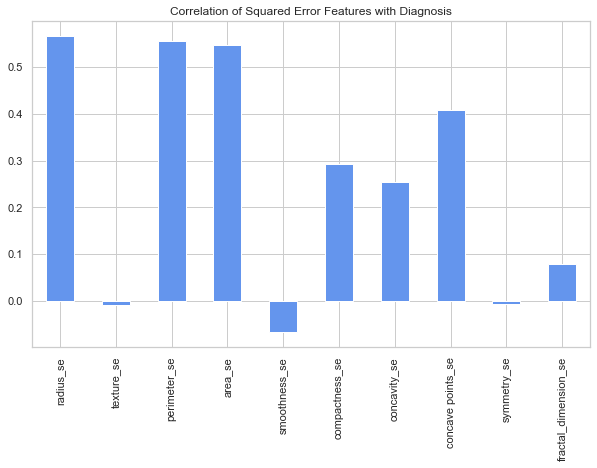

In [20]:
# Correlation of Squared Error Features with Diagnosis:
plt.figure(figsize=(10,6))
df_se.drop('diagnosis', axis=1).corrwith(df_se.diagnosis).plot(kind='bar', grid=True, title="Correlation of Squared Error Features with Diagnosis", color="cornflowerblue");

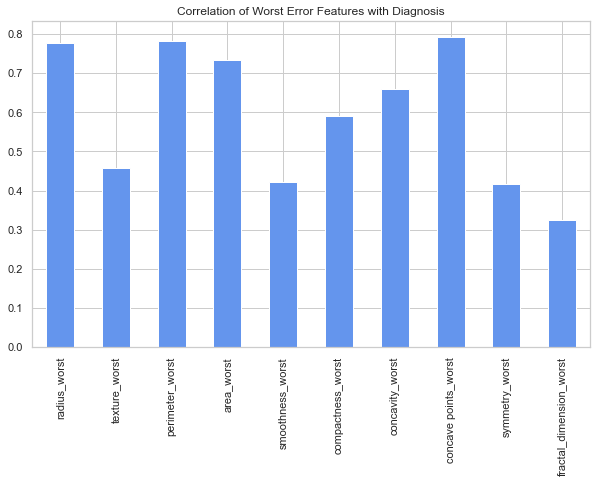

In [21]:
# Correlation of Worst Features with Diagnosis:
plt.figure(figsize=(10,6))
df_worst.drop('diagnosis', axis=1).corrwith(df_worst.diagnosis).plot(kind='bar', grid=True, title="Correlation of Worst Error Features with Diagnosis", color="cornflowerblue");

In [22]:
df_mean_cols = list(data.columns[1:11])
df_se_cols = list(data.columns[11:21])
df_worst_cols = list(data.columns[21:])

dfM = data[data['diagnosis'] == 1]
dfB = data[data['diagnosis'] == 0]

# Distribution based on Nucleus and Diagnosis:

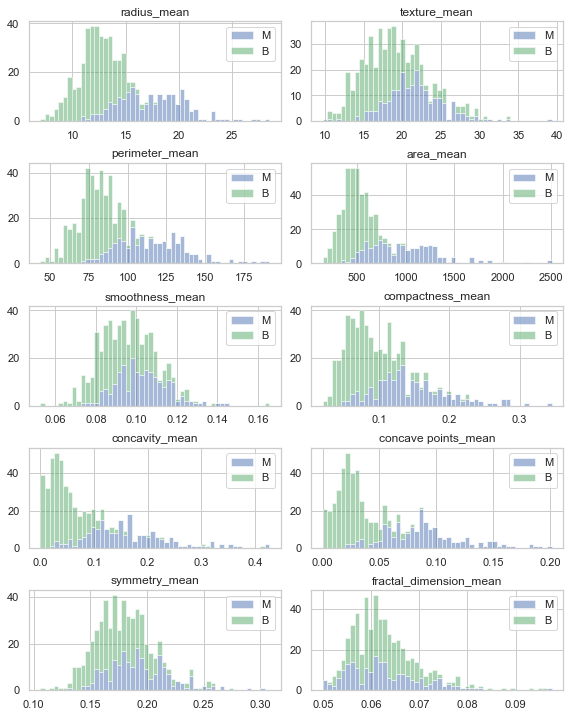

In [23]:
# Mean Features vs Diagnosis:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(data[df_mean_cols[idx]]) - min(data[df_mean_cols[idx]])) / 50
    ax.hist([dfM[df_mean_cols[idx]], dfB[df_mean_cols[idx]]],
            bins=np.arange(min(data[df_mean_cols[idx]]), max(data[df_mean_cols[idx]]) + binwidth, binwidth), alpha=0.5,stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(df_mean_cols[idx])
plt.tight_layout()
plt.show()

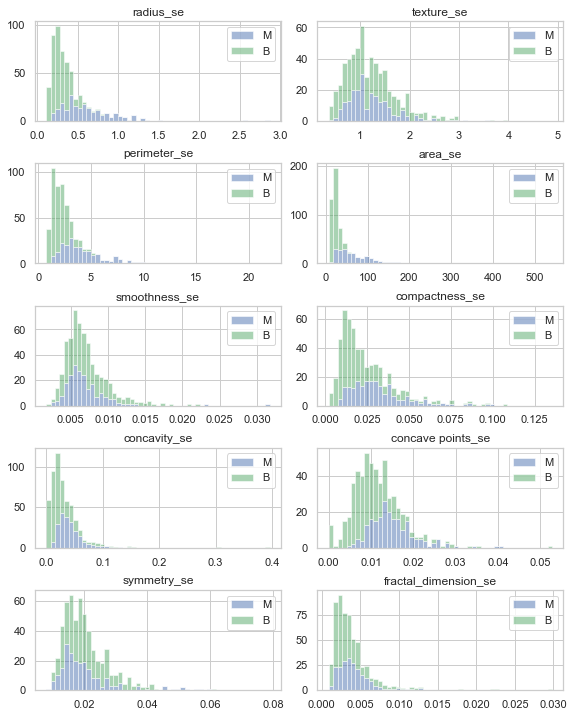

In [24]:
# Squared Error Features vs Diagnosis:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(data[df_se_cols[idx]]) - min(data[df_se_cols[idx]])) / 50
    ax.hist([dfM[df_se_cols[idx]], dfB[df_se_cols[idx]]],
            bins=np.arange(min(data[df_se_cols[idx]]), max(data[df_se_cols[idx]]) + binwidth, binwidth), alpha=0.5,stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(df_se_cols[idx])
plt.tight_layout()
plt.show()

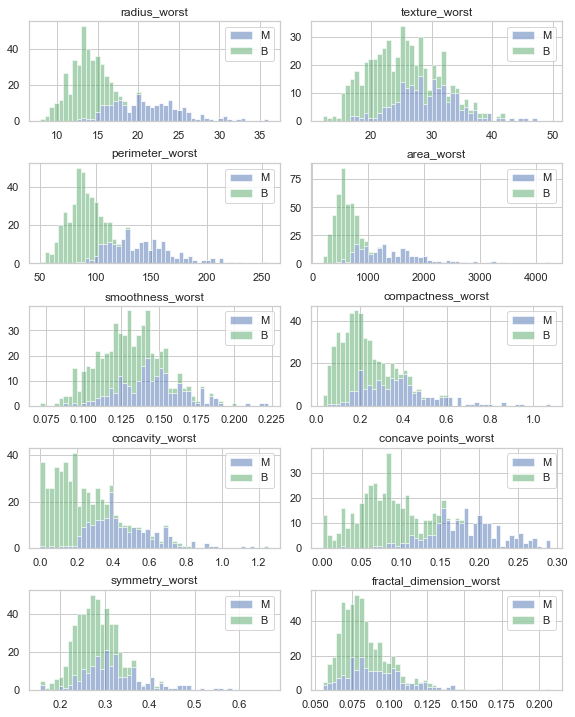

In [25]:
# Worst Features vs Diagnosis:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(data[df_worst_cols[idx]]) - min(data[df_worst_cols[idx]])) / 50
    ax.hist([dfM[df_worst_cols[idx]], dfB[df_worst_cols[idx]]],
            bins=np.arange(min(data[df_worst_cols[idx]]), max(data[df_worst_cols[idx]]) + binwidth, binwidth), alpha=0.5,stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(df_worst_cols[idx])
plt.tight_layout()
plt.show()

# ML Models

In [118]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [119]:
#standardising the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.svm import SVC
import time
dt=tree.DecisionTreeClassifier()

In [30]:
algo_list = []
algo_list.append(('Support Vector Machine', SVC()))
algo_list.append(('Decision Tree', tree.DecisionTreeClassifier())) 
algo_list.append(('Random Forest', RandomForestClassifier()))

In [31]:
#finding accuracy
num_folds = 10
results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Support Vector Machine: 0.973671 (0.021451) (run time: 0.451300)
Decision Tree: 0.916570 (0.037707) (run time: 0.417481)
Random Forest: 0.962850 (0.038929) (run time: 1.884551)


In [43]:
#finding f1
num_folds = 10
acc_results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    end = time.time()
    acc_results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Support Vector Machine: 0.962699 (0.031409) (run time: 0.088762)
Decision Tree: 0.890288 (0.065382) (run time: 0.100776)
Random Forest: 0.941378 (0.049087) (run time: 2.022698)


In [42]:
# finding precision
num_folds = 10
f1_results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    end = time.time()
    f1_results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Support Vector Machine: 0.975229 (0.030495) (run time: 0.090731)
Decision Tree: 0.872834 (0.041456) (run time: 0.086766)
Random Forest: 0.943816 (0.045453) (run time: 2.095438)


In [41]:
#finding recall
num_folds = 10
precision_results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    end = time.time()
    precision_results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Support Vector Machine: 0.952500 (0.053640) (run time: 0.086740)
Decision Tree: 0.871003 (0.107089) (run time: 0.103721)
Random Forest: 0.930139 (0.069339) (run time: 2.557213)


In [36]:
#finding roc_auc
num_folds = 10
roc_results = []
names = []

for name, model in algo_list:
    kfold = KFold(n_splits=num_folds, random_state=21,shuffle=True)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    end = time.time()
    roc_results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Support Vector Machine: 0.993140 (0.010214) (run time: 0.083776)
Decision Tree: 0.913684 (0.039062) (run time: 0.082818)
Random Forest: 0.988077 (0.017622) (run time: 2.216076)


                 Algorithm  Accuracy    F-1  Precision  Recall  ROC-AUC
0  Support Vector Machines     96.26  97.36      97.52   95.25    99.31
1            Decision Tree     89.02  91.65      87.28   87.10    91.36
2           Random Forests     94.13  96.28      94.38   93.01    98.80


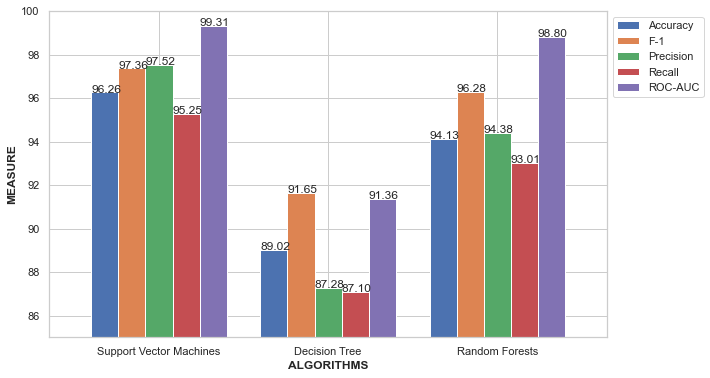

<Figure size 432x288 with 0 Axes>

In [88]:
from decimal import Decimal
df1 = pd.DataFrame({
    'Algorithm': ['Support Vector Machines','Decision Tree','Random Forests'],
    'Accuracy': [96.26,89.02,94.13],
    'F-1': [97.36,91.65,96.28],
    'Precision': [97.52,87.28,94.38],
    'Recall': [95.25,87.10,93.01],
    'ROC-AUC':[99.31,91.36,98.80]
})

print(df1)
df1.head(10)

#fig = plt.figure(figsize=(20,20))
ax=df1.plot(x="Algorithm",y=["Accuracy","F-1","Precision","Recall","ROC-AUC"],kind="bar",width=0.8,figsize=(10,6))
for p in ax.patches:
    ax.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.xlabel("ALGORITHMS",fontweight='bold')
plt.ylabel("MEASURE",fontweight='bold')
plt.xticks(rotation=0)
plt.ylim(85,100)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.show()
plt.savefig("performance comparison of the algorithms.jpg")

## SVM

In [49]:
num_folds = 10
c_values=[0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
svc=SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result=grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978116 using {'C': 0.1, 'kernel': 'linear'}
0.978116 (0.021838) with: {'C': 0.1, 'kernel': 'linear'}
0.830725 (0.039284) with: {'C': 0.1, 'kernel': 'poly'}
0.945217 (0.031080) with: {'C': 0.1, 'kernel': 'rbf'}
0.947295 (0.024241) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.978019 (0.024081) with: {'C': 0.3, 'kernel': 'linear'}
0.874686 (0.039291) with: {'C': 0.3, 'kernel': 'poly'}
0.956135 (0.025891) with: {'C': 0.3, 'kernel': 'rbf'}
0.958357 (0.026608) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.973720 (0.025404) with: {'C': 0.7, 'kernel': 'linear'}
0.883527 (0.032546) with: {'C': 0.7, 'kernel': 'poly'}
0.973720 (0.025404) with: {'C': 0.7, 'kernel': 'rbf'}
0.958309 (0.024815) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.969372 (0.031065) with: {'C': 0.9, 'kernel': 'linear'}
0.890097 (0.029553) with: {'C': 0.9, 'kernel': 'poly'}
0.973671 (0.023551) with: {'C': 0.9, 'kernel': 'rbf'}
0.956087 (0.027771) with: {'C': 0.9, 'kernel': 'sigmoid'}
0.969372 (0.031065) with: {'C': 1.0, 'kernel': 'line

In [50]:
#grid search to find the best hyperparameters

gc_svc = SVC(random_state=999)

params_svc = {'C': [0.1,0.3,0.7,0.9,1.0,1.3,1.5,1.7,2.0],'gamma': [0.01,0.1,1,10]}

gs_SVC = GridSearchCV(estimator=gc_svc, param_grid=params_svc,  cv=10, verbose=1, scoring='accuracy')

gs_SVC.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=SVC(random_state=999),
             param_grid={'C': [0.1, 0.3, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
                         'gamma': [0.01, 0.1, 1, 10]},
             scoring='accuracy', verbose=1)

In [51]:
#grid search best parameter
print(gs_SVC.best_params_)
#grid search best score
print(gs_SVC.best_score_)

{'C': 1.3, 'gamma': 0.01}
0.9780676328502416


In [121]:
svc=SVC(C=1.3,gamma=0.01)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [122]:
print("Accuracy on Training set:{:.2f}".format(svc.score(X_train,y_train)))
print("Accuracyv on Test set:{:.2f}".format(svc.score(X_test,y_test)))

Accuracy on Training set:0.98
Accuracyv on Test set:0.96


In [123]:
from sklearn.metrics import classification_report, roc_auc_score,f1_score, confusion_matrix,accuracy_score

print("Accuracy Score:%f" % accuracy_score(y_test,y_pred))
print("F1 Score:%f" % f1_score(y_test,y_pred))
print("ROC Score:%f" % roc_auc_score(y_test,y_pred))
print(classification_report(y_test,y_pred,))

Accuracy Score:0.956140
F1 Score:0.945055
ROC Score:0.949984
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



[[66  1]
 [ 4 43]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

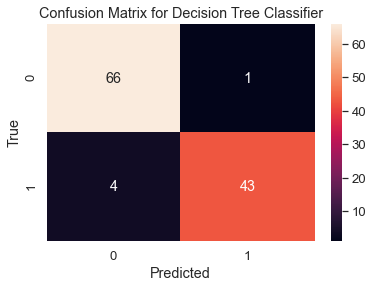

In [124]:
cm_dtc=confusion_matrix(y_test, y_pred)
print(cm_dtc)

sns.set(font_scale=1.2)
sns.heatmap(cm_dtc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision Tree Classifier")

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


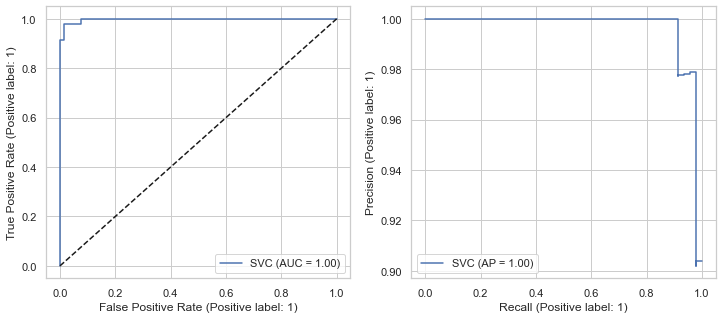

In [125]:
sns.set(style='whitegrid')
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
plot_roc_curve(svc,X_test, y_test,ax=ax)
plt.plot([0, 1], [0, 1], 'k--')
ax = fig.add_subplot(1,2,2)
plot_precision_recall_curve(svc, X_test, y_test,ax=ax)
plt.show()

# PCA

Eigenvalues:
[1.29662113e+01 5.83521901e+00 2.76659252e+00 1.93470454e+00
 1.66432508e+00 1.21149485e+00 6.38228276e-01 4.35009272e-01
 4.14199361e-01 3.38210337e-01 2.97696358e-01 2.56804537e-01
 2.22442170e-01 1.60076465e-01 9.18550777e-02 7.73422879e-02
 6.11136337e-02 5.24205270e-02 4.47829953e-02 3.11978746e-02
 2.88571157e-02 2.55718172e-02 2.12357455e-02 1.72614411e-02
 1.61397801e-02 7.74195047e-03 6.56109696e-03 1.42010669e-03
 7.83730386e-04 1.12221314e-04]

Variances (Percentage):
[4.37668984e+01 1.96965353e+01 9.33851619e+00 6.53051344e+00
 5.61785900e+00 4.08934970e+00 2.15431259e+00 1.46835542e+00
 1.39811245e+00 1.14161471e+00 1.00486148e+00 8.66832865e-01
 7.50844148e-01 5.40331345e-01 3.10052935e-01 2.61065626e-01
 2.06286489e-01 1.76943275e-01 1.51163109e-01 1.05307108e-01
 9.74059750e-02 8.63165886e-02 7.16803619e-02 5.82652652e-02
 5.44791461e-02 2.61326268e-02 2.21467056e-02 4.79351014e-03
 2.64544881e-03 3.78798304e-04]



Text(0, 0.5, 'Explained variance (%)')

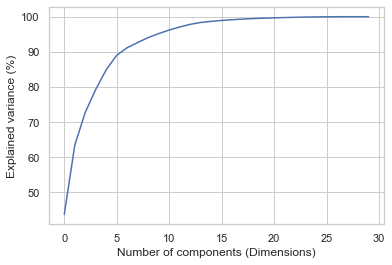

In [107]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
# plt.figure(figsize=(40,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [108]:
from sklearn.decomposition import PCA
# this will show the minimum number of components for for 95% variance.
pca = PCA(n_components=0.95)
pca.fit(X_train)
print(pca.explained_variance_ratio_*100)
pca_train_X = pca.transform(X_train)

pca.fit(X_test)
print(pca.explained_variance_ratio_*100)
pca_test_X = pca.transform(X_test)

[43.76689842 19.69653529  9.33851619  6.53051344  5.617859    4.0893497
  2.15431259  1.46835542  1.39811245  1.14161471]
[47.16924263 16.40254556 10.15591432  6.70775234  5.2435616   4.18504454
  2.33911411  1.79329866  1.20775928]


In [109]:
#taking only 10 columns
X_train = pca_train_X[:,:9]
X_test = pca_test_X[:,:9]
print(X_train.shape)
print(X_test.shape)

(455, 9)
(114, 9)


In [110]:
svc=SVC(C=1.3,gamma=0.01)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [111]:
print("Accuracy on Training set:{:.2f}".format(svc.score(X_train,y_train)))
print("Accuracyv on Test set:{:.2f}".format(svc.score(X_test,y_test)))

Accuracy on Training set:0.98
Accuracyv on Test set:0.93


In [112]:
from sklearn.metrics import classification_report, roc_auc_score,f1_score, confusion_matrix,accuracy_score

print("Accuracy Score:%f" % accuracy_score(y_test,y_pred))
print("F1 Score:%f" % f1_score(y_test,y_pred))
print("ROC Score:%f" % roc_auc_score(y_test,y_pred))
print(classification_report(y_test,y_pred,))

Accuracy Score:0.929825
F1 Score:0.913043
ROC Score:0.924420
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



[[64  3]
 [ 5 42]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

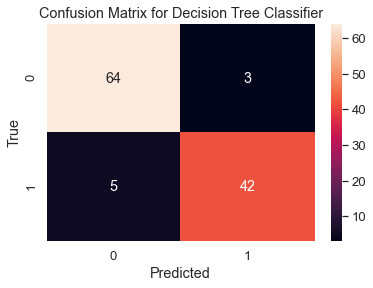

In [113]:
cm_dtc=confusion_matrix(y_test, y_pred)
print(cm_dtc)

sns.set(font_scale=1.2)
sns.heatmap(cm_dtc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision Tree Classifier")

C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\apratim sadhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


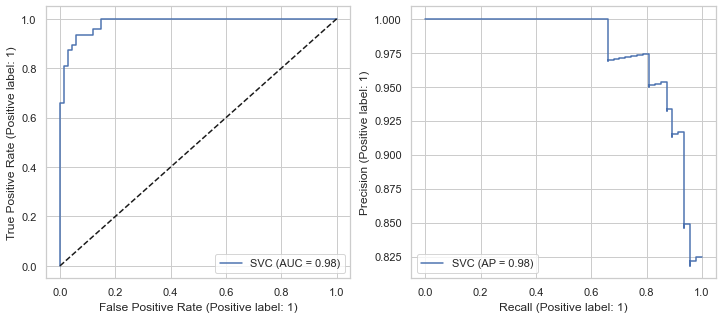

In [116]:
sns.set(style='whitegrid')
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
plot_roc_curve(svc,X_test, y_test,ax=ax)
plt.plot([0, 1], [0, 1], 'k--')
ax = fig.add_subplot(1,2,2)
plot_precision_recall_curve(svc, X_test, y_test,ax=ax)
plt.show()